<h1> Problem Statement</h1>

<b style="color:#000; border:1px solid; padding: 4px;">To Predict the Batch Performance of Machines</b>

<h2> Overview </h2>

Data is being recorded from various condition monitoring sensors in a manufacturing plant.
    There are hundreds of such sensors which may be impacting the quality of final product which is getting manufactured.
    Important point to note about real-life datasets is that they have various shifts since they are being recorded over the period of time and environment changes with time and further that is going to be the main focus of this challenge.

- Input parameters are the sensors attached to a machine, which are 55 in number. In the dataset, they are named as `x0, x1, x2 … x54`.
- Since this is a batch manufacturing, a batch is of a certain time period, say t0 is the batch start and t6 is the batch end. Sensor values being recorded at time instance t0, t1, t2 … t6 are labeled as `x0_t0, x0_t1, x0_t2 … x0_t6` respectively in the dataset, similarly for the others. All values are numerical (float or binary), there are no string or multiclass type features.
- All the sensors attached to the machine are physically independent although there can be statistical dependency present in their values.
- **Then there is output parameter y2 which has to be considered independently. They describe the batch performance.**
- Rows in the dataset represent batches. Row numbers are important as they are sorted time-wise. Although batches are considered independent to each other, you may find statistical dependency among them, hence you may convert this problem into a time series multivariate regression problem. It is completely your decision.
- Batch performance is related to the machine’s state which is being captured by those 55 sensors. Hence this problem can be modeled as a multivariate regression problem where you train a model by looking at the machine’s state and compute the batch performance.

## Data Dictionary
Two csv files are provided namely `TRAIN.csv` and `TEST.csv`.

`TRAIN.csv` contains **794 Rows** with **387 Columns** (`'Id'`, `385 Sensor Columns`, `'y2'(target variable)`)<br>
`TEST.csv` contains **89 Rows** with **386 Columns** (`'Id'`, `385 Sensor Columns`)

<h1>________________________________________________________________</h1>

## 1. Import Important Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Hyperparameter tuning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

<h1>________________________________________________________________</h1>

## 2. Load the dataset

In [2]:
df = pd.read_csv("data/train.csv")
df

,Id,x0_t0,x0_t1,x0_t2,x0_t3,x0_t4,x0_t5,x0_t6,x1_t0,x1_t1,...,x53_t5,x53_t6,x54_t0,x54_t1,x54_t2,x54_t3,x54_t4,x54_t5,x54_t6,y2
0,706,762.212216,753.162754,754.610620,762.787135,768.170347,769.815486,750.950000,0.902534,0.873314,...,87.200000,87.2,1.788239,1.883677,1.894829,1.865024,1.755078,2.030000,2.03,0.72
1,239,762.671780,746.631882,745.807832,755.992886,761.814347,766.110745,762.535189,1.366119,1.358298,...,72.613391,87.2,1.920067,1.820872,1.863998,1.827162,1.964556,1.965790,2.03,0.62
2,613,766.867777,756.642963,750.059697,756.377980,760.087594,758.380275,750.950000,0.821431,0.825063,...,87.200000,87.2,2.084817,2.019537,2.197232,2.032493,1.976534,2.030000,2.03,0.57
3,588,751.077287,758.230866,761.391167,763.190054,768.715192,770.447814,750.950000,0.712874,0.744777,...,87.200000,87.2,1.853655,1.848088,1.880007,2.068814,1.871028,2.030000,2.03,1.01
4,780,772.430815,772.254344,772.322597,771.926261,768.820073,772.908223,750.950000,0.742664,0.676266,...,87.200000,87.2,2.211915,2.387687,2.368041,2.360032,2.352961,2.030000,2.03,-0.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,835,763.265377,768.972867,767.597122,768.373657,771.840088,771.489375,750.950000,0.725262,0.744022,...,87.200000,87.2,1.850495,2.040472,1.837671,2.152408,2.022396,2.030000,2.03,0.59
790,192,772.845298,779.643309,765.493016,762.805179,750.726161,776.701181,750.950000,0.566143,0.584223,...,87.200000,87.2,1.727573,1.717891,1.775925,1.757038,1.514055,2.030000,2.03,0.60
791,629,756.290874,731.285669,734.104920,741.191223,748.162432,753.351253,750.950000,0.860182,0.890961,...,89.937783,87.2,2.051121,2.095475,1.904220,2.161476,1.795638,2.117921,2.03,0.58
792,559,760.639312,749.238254,748.407369,741.520880,743.762440,747.248147,757.761289,0.038068,0.053888,...,87.619348,87.2,2.040798,1.790221,1.851191,1.971021,1.904731,1.820687,2.03,0.43


In [3]:
df.shape

(794, 387)

In [4]:
df.describe()

,Id,x0_t0,x0_t1,x0_t2,x0_t3,x0_t4,x0_t5,x0_t6,x1_t0,x1_t1,...,x53_t5,x53_t6,x54_t0,x54_t1,x54_t2,x54_t3,x54_t4,x54_t5,x54_t6,y2
count,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,7.940000e+02,7.940000e+02,...,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000
mean,438.658690,754.919194,754.729879,754.646425,754.540917,754.424182,754.535914,752.154530,8.751822e-01,8.713170e-01,...,86.782481,87.233572,1.931834,1.929294,1.929327,1.930606,1.918361,2.004459,2.028760,0.528841
std,254.610219,13.126818,17.596497,13.928037,13.114229,13.238951,13.424742,7.333076,3.501364e-01,3.526789e-01,...,8.688329,1.375731,0.370322,0.416583,0.375554,0.364132,0.373211,0.184948,0.029712,0.184369
min,0.000000,694.863409,436.366425,648.518443,689.144977,682.132476,680.739213,704.677729,-1.164153e-11,-1.164153e-11,...,25.000000,75.965148,0.135551,0.141006,0.123514,0.086733,0.032860,0.079038,1.273031,-1.660000
25%,217.250000,746.507394,746.225540,746.135900,746.381193,746.140993,746.019990,750.950000,6.932981e-01,6.882317e-01,...,87.200000,87.200000,1.804678,1.780031,1.783420,1.802233,1.779655,2.030000,2.030000,0.450000
50%,438.500000,756.095127,756.750034,755.696801,755.539600,756.077535,755.891258,750.950000,7.969188e-01,7.985343e-01,...,87.200000,87.200000,1.964852,1.951801,1.977931,1.974037,1.944210,2.030000,2.030000,0.580000
75%,658.750000,764.434651,764.838969,764.572070,764.113391,764.013162,764.111608,750.950000,1.228083e+00,1.230598e+00,...,87.200000,87.200000,2.136718,2.145547,2.136183,2.135681,2.121476,2.030000,2.030000,0.600000
max,881.000000,790.272046,791.044214,790.588038,789.457827,786.099166,788.762156,785.730598,1.568039e+00,1.596464e+00,...,125.000000,123.653108,3.026312,6.884922,2.994906,2.932883,2.807641,2.729407,2.083415,1.600000


<br>
<big>By looking at the data, we get an intuition that there might be variation with the input entries for sensors and also the columns might contain outliers.</big>
<br>

**We will combine the time-periods of each sensor into one based on their average value per batch.<br>
So, we are going to have 55 columns and will look for outliers and treat them, if found any.**

<h1>________________________________________________________________</h1>

## 3. Data Preprocessing

In [5]:
# Subsetting the dataset into new dataframe without 'Id' and 'y2' columns
target_var = df['y2']
train_df = df.iloc[:, 1:-1]
train_df

,x0_t0,x0_t1,x0_t2,x0_t3,x0_t4,x0_t5,x0_t6,x1_t0,x1_t1,x1_t2,...,x53_t4,x53_t5,x53_t6,x54_t0,x54_t1,x54_t2,x54_t3,x54_t4,x54_t5,x54_t6
0,762.212216,753.162754,754.610620,762.787135,768.170347,769.815486,750.950000,0.902534,0.873314,0.807268,...,91.178811,87.200000,87.2,1.788239,1.883677,1.894829,1.865024,1.755078,2.030000,2.03
1,762.671780,746.631882,745.807832,755.992886,761.814347,766.110745,762.535189,1.366119,1.358298,1.304489,...,71.894269,72.613391,87.2,1.920067,1.820872,1.863998,1.827162,1.964556,1.965790,2.03
2,766.867777,756.642963,750.059697,756.377980,760.087594,758.380275,750.950000,0.821431,0.825063,0.775300,...,87.371393,87.200000,87.2,2.084817,2.019537,2.197232,2.032493,1.976534,2.030000,2.03
3,751.077287,758.230866,761.391167,763.190054,768.715192,770.447814,750.950000,0.712874,0.744777,0.721926,...,88.782148,87.200000,87.2,1.853655,1.848088,1.880007,2.068814,1.871028,2.030000,2.03
4,772.430815,772.254344,772.322597,771.926261,768.820073,772.908223,750.950000,0.742664,0.676266,0.734769,...,90.113780,87.200000,87.2,2.211915,2.387687,2.368041,2.360032,2.352961,2.030000,2.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,763.265377,768.972867,767.597122,768.373657,771.840088,771.489375,750.950000,0.725262,0.744022,0.796037,...,78.020021,87.200000,87.2,1.850495,2.040472,1.837671,2.152408,2.022396,2.030000,2.03
790,772.845298,779.643309,765.493016,762.805179,750.726161,776.701181,750.950000,0.566143,0.584223,0.584583,...,77.851452,87.200000,87.2,1.727573,1.717891,1.775925,1.757038,1.514055,2.030000,2.03
791,756.290874,731.285669,734.104920,741.191223,748.162432,753.351253,750.950000,0.860182,0.890961,0.871968,...,89.539653,89.937783,87.2,2.051121,2.095475,1.904220,2.161476,1.795638,2.117921,2.03
792,760.639312,749.238254,748.407369,741.520880,743.762440,747.248147,757.761289,0.038068,0.053888,0.045037,...,90.216451,87.619348,87.2,2.040798,1.790221,1.851191,1.971021,1.904731,1.820687,2.03


We are taking mean values of batches for every time-period in each sensor and concatenating them to one column.<br>
**The columns will be named as `x0mean, x1mean, .... , x54mean`** and will have 794 rows each

In [6]:
new_df = pd.DataFrame() # creating a new dataframe

for i in range(0,55):
    temp = pd.concat([train_df['x'+str(i)+'_t0'], train_df['x'+str(i)+'_t1'], train_df['x'+str(i)+'_t2'],
                      train_df['x'+str(i)+'_t3'], train_df['x'+str(i)+'_t4'],
                      train_df['x'+str(i)+'_t5'], train_df['x'+str(i)+'_t6']],axis=1)
    temp = temp.T.describe()
    new_df['x'+str(i)+'mean'] = temp.loc['mean'] # saving the columns as their mean entries per batch

In [7]:
new_df.describe()

,x0mean,x1mean,x2mean,x3mean,x4mean,x5mean,x6mean,x7mean,x8mean,x9mean,...,x45mean,x46mean,x47mean,x48mean,x49mean,x50mean,x51mean,x52mean,x53mean,x54mean
count,794.000000,7.940000e+02,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,...,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000
mean,754.278720,9.259752e-01,0.996761,23.752049,6.708213,741.695309,806.572313,811.880140,4.440788,0.227417,...,0.070169,86.479670,0.779507,563.156050,120.362057,14.908864,847.671093,660.500530,84.930365,1.953234
std,10.442060,3.132682e-01,0.041707,3.116461,0.136517,27.153071,24.534465,27.688053,0.090729,0.064697,...,0.108619,7.102586,0.169149,102.736418,22.568670,3.078514,68.092720,48.895239,11.154414,0.259244
min,705.253328,1.663076e-12,0.428571,6.133485,6.400000,552.307703,772.599976,758.599976,3.900000,0.020496,...,0.000000,40.583001,0.071429,252.402575,20.197731,2.148074,466.652857,437.121429,33.885714,0.480426
25%,747.748846,7.511838e-01,1.000000,21.374627,6.600000,735.885254,786.375704,776.811439,4.400000,0.188060,...,0.000000,85.760625,0.714286,495.188330,110.038207,13.573461,849.456677,642.064225,79.997382,1.878213
50%,755.405549,8.661673e-01,1.000000,22.956865,6.728571,747.446286,796.747164,817.782857,4.400000,0.243820,...,0.000000,87.357582,0.857143,564.475955,124.380507,15.104114,860.811424,666.157657,86.651310,1.978201
75%,761.893819,1.262246e+00,1.000000,26.681916,6.814286,755.255640,832.599976,838.011408,4.485714,0.271739,...,0.142857,89.938244,0.857143,631.548358,136.379751,16.714867,872.335265,688.764794,88.560284,2.082831
max,781.188660,1.513436e+00,1.000000,29.378689,7.000000,882.839507,850.000000,845.400024,4.700000,0.463457,...,0.714286,97.166488,1.000000,743.721222,165.184725,26.854474,919.605772,902.814286,123.307948,2.803538


In [8]:
# Treat the Null values with median, if any. As the dataset is too large to look into respective columns specifically
new_df.fillna(new_df.median(), inplace=True)

<h1>________________________________________________________________</h1>

## 4. Standardizing the Data

In [9]:
# Using StandardScaler to standardize the data for feature optimization
sc = StandardScaler()
scaled_df = pd.DataFrame(sc.fit_transform(new_df),columns = new_df.columns) # Saving the scaled values in a new dataframe

In [10]:
scaled_df.describe()

,x0mean,x1mean,x2mean,x3mean,x4mean,x5mean,x6mean,x7mean,x8mean,x9mean,...,x45mean,x46mean,x47mean,x48mean,x49mean,x50mean,x51mean,x52mean,x53mean,x54mean
count,7.940000e+02,7.940000e+02,7.940000e+02,7.940000e+02,7.940000e+02,7.940000e+02,7.940000e+02,7.940000e+02,7.940000e+02,7.940000e+02,...,7.940000e+02,7.940000e+02,7.940000e+02,7.940000e+02,7.940000e+02,7.940000e+02,7.940000e+02,7.940000e+02,7.940000e+02,7.940000e+02
mean,-5.566461e-15,-3.722883e-17,-6.220535e-16,1.093444e-16,-1.380438e-16,3.349825e-15,6.683990e-15,-4.526667e-15,-6.288421e-15,-5.495010e-16,...,7.914184e-17,-1.313581e-15,9.387956e-16,8.214811e-17,7.210857e-16,1.962466e-16,4.733130e-16,3.091985e-15,5.804201e-16,-2.226039e-16
std,1.000630e+00,1.000630e+00,1.000630e+00,1.000630e+00,1.000630e+00,1.000630e+00,1.000630e+00,1.000630e+00,1.000630e+00,1.000630e+00,...,1.000630e+00,1.000630e+00,1.000630e+00,1.000630e+00,1.000630e+00,1.000630e+00,1.000630e+00,1.000630e+00,1.000630e+00,1.000630e+00
min,-4.697952e+00,-2.957718e+00,-1.363184e+01,-5.656951e+00,-2.259115e+00,-6.979210e+00,-1.385551e+00,-1.925514e+00,-5.964215e+00,-3.200300e+00,...,-6.464187e-01,-6.466039e+00,-4.188764e+00,-3.026671e+00,-4.441000e+00,-4.147726e+00,-5.599107e+00,-4.571404e+00,-4.579069e+00,-5.684744e+00
25%,-6.257376e-01,-5.583129e-01,7.769889e-02,-7.633403e-01,-7.931738e-01,-2.141090e-01,-8.237122e-01,-1.267363e+00,-4.498408e-01,-6.087083e-01,...,-6.464187e-01,-1.013008e-01,-3.858282e-01,-6.619908e-01,-4.577300e-01,-4.340551e-01,2.623936e-02,-3.772949e-01,-4.425237e-01,-2.895675e-01
50%,1.079805e-01,-1.910365e-01,7.769889e-02,-2.553167e-01,1.492175e-01,2.119319e-01,-4.007156e-01,2.133208e-01,-4.498406e-01,2.536879e-01,...,-6.464187e-01,1.236825e-01,4.592686e-01,1.285558e-02,1.781666e-01,6.346328e-02,1.930987e-01,1.157719e-01,1.543810e-01,9.636630e-02
75%,7.297313e-01,1.074105e+00,7.769889e-02,9.407190e-01,7.774810e-01,4.997180e-01,1.061530e+00,9.443690e-01,4.954797e-01,6.854925e-01,...,6.696235e-01,4.872527e-01,4.592686e-01,6.661262e-01,7.101788e-01,5.870173e-01,3.624428e-01,5.784219e-01,3.256296e-01,5.002156e-01
max,2.578696e+00,1.876447e+00,7.769889e-02,1.806596e+00,2.138712e+00,5.201370e+00,1.771184e+00,1.211389e+00,2.858781e+00,3.650660e+00,...,5.933792e+00,1.505586e+00,1.304366e+00,1.758665e+00,1.987309e+00,3.882762e+00,1.057088e+00,4.958898e+00,3.442742e+00,3.281999e+00


As there might be statistical dependencies between multiple sensors, we can drop some of the sensor columns from our features.
<br>
By checking the correlation matrix of the scaled data, we can find out which sensors are highly correlated.
<br>
**So, we will remove the sensor columns which have correlation greater than 0.9 to minimize the collinearity**

<h1>________________________________________________________________</h1>

## 5. Correlation Matrix

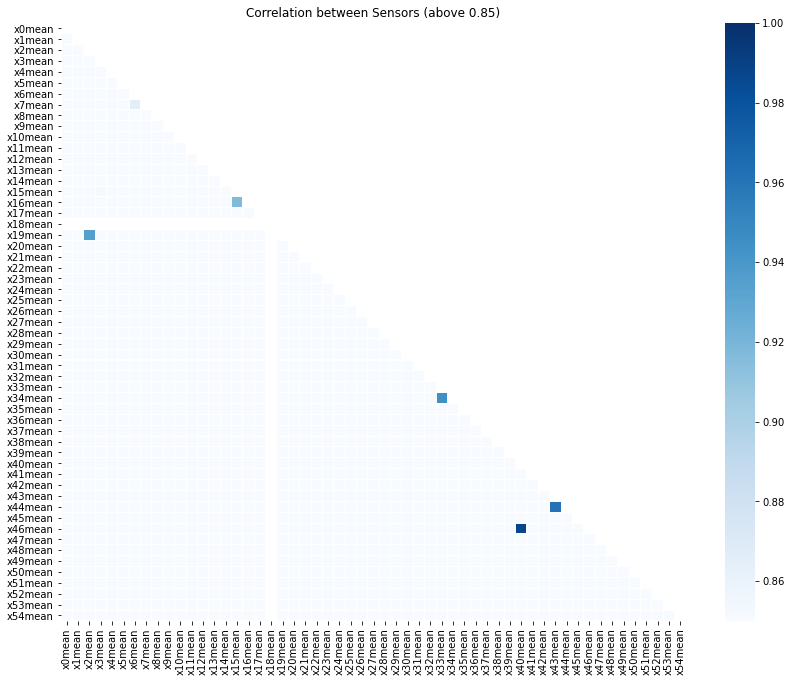

In [11]:
# Create correlation matrix
corr_matrix = scaled_df.corr().abs()

# let's plot the correlation matrix
plt.figure(figsize=(14,11))
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_matrix, linewidth=.01, vmin=0.85, vmax=1, cmap='Blues', mask=mask)
plt.title("Correlation between Sensors (above 0.85)")
plt.show()

**Insight:**<br>
We notice that sensors `x16, x19, x34, x44, and x46` have much higher correlation than other sensors.<br>
***So, we will drop these sensors***

In [12]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)) # selecting upper triangle of corr_matrix

# Getting index of columns with correlation greater than 0.9 to drop them out
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
to_drop

['x16mean', 'x19mean', 'x34mean', 'x44mean', 'x46mean']

In [13]:
#dropping the collinear columns from the scaled data
data = scaled_df.drop(columns = to_drop, axis=1).copy()
data.shape, data

((794, 50),
        x0mean    x1mean    x2mean    x3mean    x4mean    x5mean    x6mean  \
 0    0.571642  0.036073  0.077699 -0.544414  0.149217  0.252583 -0.683879   
 1    0.295881  1.448846  0.077699  1.009292 -1.526144  0.291188  1.591731   
 2    0.265786 -0.197031  0.077699 -0.475357  1.405742  2.895255 -0.547541   
 3    0.603043 -0.375394  0.077699  1.466462  1.405742  0.427025 -0.547541   
 4    1.391698 -0.329395  0.077699 -1.449773  0.777481  0.705512 -1.250204   
 ..        ...       ...       ...       ...       ...       ...       ...   
 789  1.129901 -0.299285  0.077699 -0.860414 -1.107304 -0.565930 -0.823712   
 790  1.084392 -0.749192  0.077699  0.960253 -1.107304  0.339481  1.301752   
 791 -0.884546  0.029472  0.077699 -0.452056  1.405742  0.027632 -0.547541   
 792 -0.429487 -2.813767  0.077699 -2.135504  1.405742  0.341025 -1.018489   
 793 -0.236083 -0.202584  0.077699  1.201171  0.149217  0.384257 -0.683879   
 
        x7mean    x8mean    x9mean  ...   x43mean 

<h1>________________________________________________________________</h1>

## 6. Outliers Treatment

We will remove all the rows with outliers in any column to optimize our data for final model building

In [14]:
# Loop over all the columns and remove their outliers accordingly, if found
for i in data.columns:
    q1 = data[i].describe()['25%'] # Get First Quartile
    q3 = data[i].describe()['75%'] # Get Third Quartile

    iqr = q3 - q1 # Interquartile range

    final_data = data[(data[i] > (q1 - 3 * iqr)) & (data[i] < (q3 + 3 * iqr))] # Removing outliers

In [15]:
# Check the final_data and its shape
final_data

,x0mean,x1mean,x2mean,x3mean,x4mean,x5mean,x6mean,x7mean,x8mean,x9mean,...,x43mean,x45mean,x47mean,x48mean,x49mean,x50mean,x51mean,x52mean,x53mean,x54mean
0,0.571642,0.036073,0.077699,-0.544414,0.149217,0.252583,-0.683879,-0.025200,-0.449841,0.645354,...,0.792130,-0.646419,0.459269,1.334740,-0.057712,-0.048929,0.455055,-0.284581,0.427270,-0.234783
1,0.295881,1.448846,0.077699,1.009292,-1.526144,0.291188,1.591731,1.045147,0.653033,0.809493,...,0.981745,-0.646419,0.881817,-0.148073,0.520654,1.344342,0.573123,1.059678,-0.951191,-0.154500
2,0.265786,-0.197031,0.077699,-0.475357,1.405742,2.895255,-0.547541,0.129683,-0.449841,-0.277761,...,-1.104015,0.669623,-1.230925,-0.155303,-0.473810,-0.315052,0.209191,0.327396,0.271738,0.384862
3,0.603043,-0.375394,0.077699,1.466462,1.405742,0.427025,-0.547541,0.129683,-0.449841,-0.716931,...,-1.104015,-0.646419,0.459269,0.652625,0.742220,-0.003427,0.355095,-0.140380,0.303608,-0.050205
4,1.391698,-0.329395,0.077699,-1.449773,0.777481,0.705512,-1.250204,-1.626693,-0.449841,0.977237,...,0.792130,0.669623,-0.385828,-0.635319,-1.277223,-0.276087,0.119122,-0.410367,0.189495,1.140293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,1.129901,-0.299285,0.077699,-0.860414,-1.107304,-0.565930,-0.823712,-0.167692,-0.449841,-1.123095,...,0.792130,-0.646419,0.459269,0.574715,0.892220,-0.226175,0.037361,-0.527268,-0.426404,0.160348
790,1.084392,-0.749192,0.077699,0.960253,-1.107304,0.339481,1.301752,0.919588,0.495480,1.740237,...,0.792130,-0.646419,0.459269,0.334689,1.187401,1.415260,0.062996,1.174342,-0.395861,-0.617656
791,-0.884546,0.029472,0.077699,-0.452056,1.405742,0.027632,-0.547541,0.129683,-0.449841,0.363036,...,-1.293630,-0.646419,0.881817,1.360998,-0.175247,0.313062,0.506378,0.562918,0.378506,0.266442
792,-0.429487,-2.813767,0.077699,-2.135504,1.405742,0.341025,-1.018489,-1.694221,-0.449841,0.282636,...,-1.293630,-0.646419,0.881817,-0.073909,0.841551,-0.712940,0.217558,0.063784,0.390321,-0.145566


**After removing collinear columns and outlier values, now shape of our data is `771 rows X 50 columns`.**<br>
We can proceed with splitting our data to build model

In [16]:
# Indexing 'y1' as per 'data' since we have removed outliers
target_var = target_var[final_data.index]
target_var.shape

(771,)

<h1>________________________________________________________________</h1>

## 7. Train_Test_Split

We will split the data in the ratio `85:15` between training and validation data, **`With Shuffling`** and **`Without Shuffling`**

In [17]:
# Splitting with Shuffle
x1_train, x1_val, y1_train, y1_val = train_test_split(final_data, target_var, test_size=0.15,
                                                      random_state=29, shuffle=True)

In [18]:
# Splitting without Shuffle
x2_train, x2_val, y2_train, y2_val = train_test_split(final_data, target_var, test_size=0.15,
                                                      random_state=29,shuffle=False)

<h1>________________________________________________________________</h1>

## 8. Model Building

It is Regression problem and we will following Regression Algorithms
- Linear Regression
- Random Forest Regression
- Gradient Boosting Regression
- Extreme Gradient Boosting Regression
- K Neighbors Regression

### 8.1. Using Linear Regression

In [19]:
lr1 = LinearRegression()
lr2 = LinearRegression()

lr1.fit(x1_train, y1_train)
lr2.fit(x2_train, y2_train)

lr1_pred = lr1.predict(x1_val) # making predictions on SHUFFLED validation data
lr2_pred = lr2.predict(x2_val) # making prediction on UNSHUFFLED validation data

print("On Shuffled Data:")
print('R2 Score: ', metrics.r2_score(y1_val, lr1_pred))
print('RMSE:', metrics.mean_squared_error(y1_val, lr1_pred)**0.5)

print("--"*20)

print("On Unshuffled Data:")
print('R2 Score: ', metrics.r2_score(y2_val, lr2_pred))
print('RMSE:', metrics.mean_squared_error(y2_val, lr2_pred)**0.5)

On Shuffled Data:
R2 Score:  0.17875630960469757
RMSE: 0.1422397710800031
----------------------------------------
On Unshuffled Data:
R2 Score:  -0.5923514675245596
RMSE: 0.18053602067356941


### 8.2 Using RandomForestRegressor

In [20]:
rf1 = RandomForestRegressor(max_depth=20, n_estimators=300)
rf2 = RandomForestRegressor(max_depth=20, n_estimators=300)

rf1.fit(x1_train, y1_train)
rf2.fit(x2_train, y2_train)

rf1_pred = rf1.predict(x1_val) # making predictions on SHUFFLED validation data
rf2_pred = rf2.predict(x2_val) # making prediction on UNSHUFFLED validation data

print("On Shuffled Data:")
print('R2 Score: ', metrics.r2_score(y1_val, rf1_pred))
print('RMSE:', metrics.mean_squared_error(y1_val, rf1_pred)**0.5)

print("--"*20)

print("On Unshuffled Data:")
print('R2 Score: ', metrics.r2_score(y2_val, rf2_pred))
print('RMSE:', metrics.mean_squared_error(y2_val, rf2_pred)**0.5)

On Shuffled Data:
R2 Score:  0.39123597185112946
RMSE: 0.12246430234770382
----------------------------------------
On Unshuffled Data:
R2 Score:  0.22952419680380642
RMSE: 0.12558098973342566


In [21]:
gb1 = GradientBoostingRegressor(max_depth=10)
gb2 = GradientBoostingRegressor(max_depth=10)

gb1.fit(x1_train, y1_train)
gb2.fit(x2_train, y2_train)

gb1_pred = gb1.predict(x1_val) # making predictions on SHUFFLED validation data
gb2_pred = gb2.predict(x2_val) # making prediction on UNSHUFFLED validation data

print("On Shuffled Data:")
print('R2 Score: ', metrics.r2_score(y1_val, gb1_pred))
print('RMSE:', metrics.mean_squared_error(y1_val, gb1_pred)**0.5)

print("--"*20)

print("On Unshuffled Data:")
print('R2 Score: ', metrics.r2_score(y2_val, gb2_pred))
print('RMSE:', metrics.mean_squared_error(y2_val, gb2_pred)**0.5)

On Shuffled Data:
R2 Score:  0.3674176577042195
RMSE: 0.12483706633649637
----------------------------------------
On Unshuffled Data:
R2 Score:  0.14016897708332932
RMSE: 0.13266334840943364


### 8.4 Using XGBRegressor

In [22]:
xgb1 = XGBRegressor()
xgb2 = XGBRegressor()

xgb1.fit(x1_train, y1_train)
xgb2.fit(x2_train, y2_train)

xgb1_pred = xgb1.predict(x1_val) # making predictions on SHUFFLED validation data
xgb2_pred = xgb2.predict(x2_val) # making prediction on UNSHUFFLED validation data

print("On Shuffled Data:")
print('R2 Score: ', metrics.r2_score(y1_val, xgb1_pred))
print('RMSE:', metrics.mean_squared_error(y1_val, xgb1_pred)**0.5)

print("--"*20)

print("On Unshuffled Data:")
print('R2 Score: ', metrics.r2_score(y2_val, xgb2_pred))
print('RMSE:', metrics.mean_squared_error(y2_val, xgb2_pred)**0.5)

On Shuffled Data:
R2 Score:  0.48329037734243185
RMSE: 0.11282576748863068
----------------------------------------
On Unshuffled Data:
R2 Score:  -0.08911423660135176
RMSE: 0.1493073257685187


### 8.5 Using KNeighborsRegressor

In [23]:
kn1 = KNeighborsRegressor()
kn2 = KNeighborsRegressor()

kn1.fit(x1_train, y1_train)
kn2.fit(x2_train, y2_train)

kn1_pred = kn1.predict(x1_val) # making predictions on SHUFFLED validation data
kn2_pred = kn2.predict(x2_val) # making prediction on UNSHUFFLED validation data

print("On Shuffled Data:")
print('R2 Score: ', metrics.r2_score(y1_val, kn1_pred))
print('RMSE:', metrics.mean_squared_error(y1_val, kn1_pred)**0.5)

print("--"*20)

print("On Unshuffled Data:")
print('R2 Score: ', metrics.r2_score(y2_val, kn2_pred))
print('RMSE:', metrics.mean_squared_error(y2_val, kn2_pred)**0.5)

On Shuffled Data:
R2 Score:  0.4234325655448734
RMSE: 0.11918183731100802
----------------------------------------
On Unshuffled Data:
R2 Score:  0.2837113430508895
RMSE: 0.12108446752520352


<h1>________________________________________________________________</h1>

## 9. Metrics Comparison

**Clearly, Shuffling the data, gives better performance as obtained in RMSE scores.<br>
So let's compare the R2_Scores of every model for shuffled data, we have obtained.**
<br>
- Using XGBRegressor  >> **`0.48`**
- Using KNeighborsRegressor >> **`0.42`**
- Using RandomForestRegressor >> **`0.38`**
- Using GradientBoostingRegressor >> **`0.36`**
- Using Linear Regression >> **`0.17`**


**As we can see, `XGBRegressor is performing the best` out of all the algorithms, We will predict our test dataset using XGBRegressor algorithm itself**

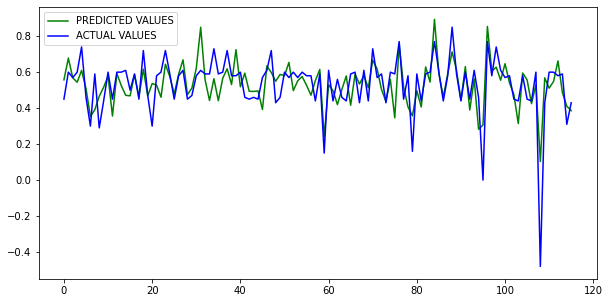

In [24]:
# Let's visualize the comparison of Predicted and Actual values in XGBRegressor
y1_val = y1_val.reset_index(drop=True)
xgb1_pred = pd.Series(xgb1_pred)
plt.figure(figsize=(10,5))
plt.plot(xgb1_pred,'g',label='PREDICTED VALUES')
plt.plot(y1_val,'b',label='ACTUAL VALUES')
plt.legend()
plt.show()

<h1>________________________________________________________________</h1>

## 10. Test Data & Preprocessing

<big>
    
**Let's Load the test dataset and Pre-process it as done on the train data earlier.**
</big>

In [25]:
df2 = pd.read_csv("data/TEST.csv")
df2

,Id,x0_t0,x0_t1,x0_t2,x0_t3,x0_t4,x0_t5,x0_t6,x1_t0,x1_t1,...,x53_t4,x53_t5,x53_t6,x54_t0,x54_t1,x54_t2,x54_t3,x54_t4,x54_t5,x54_t6
0,584,738.152456,747.990517,754.681726,750.607263,754.378901,746.444051,750.950000,0.740932,0.706801,...,90.828849,87.200000,87.2,1.964234,1.913202,1.599676,1.596884,1.480912,2.030000,2.03
1,678,750.304526,751.440356,751.625640,751.040838,749.642800,751.071232,750.950000,0.714269,0.707234,...,90.498723,87.200000,87.2,1.631347,1.660712,1.874003,1.939651,2.044686,2.030000,2.03
2,728,778.247612,766.210592,773.076177,775.301112,776.258670,766.606237,750.950000,0.943009,0.857520,...,87.886603,87.200000,87.2,1.865880,1.778088,2.307626,2.472161,2.193177,2.030000,2.03
3,338,759.227472,758.535754,762.247934,774.868563,754.005989,757.404229,750.950000,1.035127,1.049087,...,84.867806,87.200000,87.2,1.876135,2.091196,1.835713,1.870825,1.741741,2.030000,2.03
4,570,770.473802,768.971055,770.843730,771.960856,768.813193,760.116829,750.950000,1.299968,1.374928,...,88.013675,87.200000,87.2,1.893169,2.407545,2.322047,2.082357,2.099017,2.030000,2.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,808,761.359751,761.926705,762.193360,758.233805,760.852441,761.670564,750.950000,0.768703,0.854911,...,78.220706,87.200000,87.2,2.204343,2.132687,1.996730,2.283868,2.542403,2.030000,2.03
85,283,757.287455,721.480495,720.749088,732.478383,736.201201,747.705227,750.950000,0.315090,0.311234,...,73.360470,87.200000,87.2,2.407226,2.048145,1.912331,2.061708,2.127815,2.030000,2.03
86,319,773.557196,771.311961,761.259562,762.251001,768.140447,762.670460,773.956648,0.656220,0.720533,...,25.000000,25.000000,87.2,0.719684,0.645674,0.759247,1.181007,0.636709,0.599050,2.03
87,521,753.571742,740.609862,742.497223,744.314292,747.865701,749.400914,750.950000,1.409834,1.524316,...,87.845408,87.200000,87.2,2.041125,2.120623,2.082986,2.158518,1.780940,2.030000,2.03


In [26]:
test_df = df2.iloc[:, 1:]
test_df

,x0_t0,x0_t1,x0_t2,x0_t3,x0_t4,x0_t5,x0_t6,x1_t0,x1_t1,x1_t2,...,x53_t4,x53_t5,x53_t6,x54_t0,x54_t1,x54_t2,x54_t3,x54_t4,x54_t5,x54_t6
0,738.152456,747.990517,754.681726,750.607263,754.378901,746.444051,750.950000,0.740932,0.706801,0.723154,...,90.828849,87.200000,87.2,1.964234,1.913202,1.599676,1.596884,1.480912,2.030000,2.03
1,750.304526,751.440356,751.625640,751.040838,749.642800,751.071232,750.950000,0.714269,0.707234,0.666824,...,90.498723,87.200000,87.2,1.631347,1.660712,1.874003,1.939651,2.044686,2.030000,2.03
2,778.247612,766.210592,773.076177,775.301112,776.258670,766.606237,750.950000,0.943009,0.857520,0.827927,...,87.886603,87.200000,87.2,1.865880,1.778088,2.307626,2.472161,2.193177,2.030000,2.03
3,759.227472,758.535754,762.247934,774.868563,754.005989,757.404229,750.950000,1.035127,1.049087,1.076066,...,84.867806,87.200000,87.2,1.876135,2.091196,1.835713,1.870825,1.741741,2.030000,2.03
4,770.473802,768.971055,770.843730,771.960856,768.813193,760.116829,750.950000,1.299968,1.374928,1.374079,...,88.013675,87.200000,87.2,1.893169,2.407545,2.322047,2.082357,2.099017,2.030000,2.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,761.359751,761.926705,762.193360,758.233805,760.852441,761.670564,750.950000,0.768703,0.854911,0.894226,...,78.220706,87.200000,87.2,2.204343,2.132687,1.996730,2.283868,2.542403,2.030000,2.03
85,757.287455,721.480495,720.749088,732.478383,736.201201,747.705227,750.950000,0.315090,0.311234,0.318409,...,73.360470,87.200000,87.2,2.407226,2.048145,1.912331,2.061708,2.127815,2.030000,2.03
86,773.557196,771.311961,761.259562,762.251001,768.140447,762.670460,773.956648,0.656220,0.720533,1.048937,...,25.000000,25.000000,87.2,0.719684,0.645674,0.759247,1.181007,0.636709,0.599050,2.03
87,753.571742,740.609862,742.497223,744.314292,747.865701,749.400914,750.950000,1.409834,1.524316,1.463317,...,87.845408,87.200000,87.2,2.041125,2.120623,2.082986,2.158518,1.780940,2.030000,2.03


In [27]:
# Cumulate the sensors' time-period into one sensor column based on mean values for every batch
new_test = pd.DataFrame() # creating a new dataframe

for i in range(0,55):
    temp = pd.concat([test_df['x'+str(i)+'_t0'], test_df['x'+str(i)+'_t1'], test_df['x'+str(i)+'_t2'],
                      test_df['x'+str(i)+'_t3'], test_df['x'+str(i)+'_t4'],
                      test_df['x'+str(i)+'_t5'], test_df['x'+str(i)+'_t6']],axis=1)
    temp = temp.T.describe()
    new_test['x'+str(i)+'mean'] = temp.loc['mean'] # saving the columns as their mean entries per batch
    
new_test.describe()

,x0mean,x1mean,x2mean,x3mean,x4mean,x5mean,x6mean,x7mean,x8mean,x9mean,...,x45mean,x46mean,x47mean,x48mean,x49mean,x50mean,x51mean,x52mean,x53mean,x54mean
count,89.000000,89.000000,89.0,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,...,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000
mean,752.598566,0.905073,1.0,23.892568,6.716854,739.601775,805.195178,810.222306,4.446388,0.229183,...,0.080257,85.524084,0.785714,564.482249,119.140493,15.222288,858.332957,671.203088,84.388534,1.942346
std,10.565542,0.314144,0.0,2.868188,0.143853,27.373581,23.580900,27.377659,0.069696,0.070790,...,0.142784,9.061525,0.169920,116.651436,23.967555,3.367685,57.414026,56.137721,12.347123,0.292534
min,716.540859,0.000000,1.0,17.664977,6.471429,557.355121,772.599976,758.599976,4.400000,0.071989,...,0.000000,39.144389,0.071429,251.081094,20.107143,4.199121,533.305714,474.242857,33.885714,0.670876
25%,747.029962,0.772636,1.0,21.554942,6.600000,735.578736,786.375704,776.811439,4.400000,0.187492,...,0.000000,85.464059,0.714286,497.816500,110.592798,14.144473,853.430277,647.081573,80.116271,1.874914
50%,753.667400,0.871470,1.0,22.874692,6.728571,745.506840,793.147153,815.468561,4.400000,0.240761,...,0.000000,87.447246,0.857143,582.967479,123.443149,15.408207,864.020958,671.570350,86.435555,1.982976
75%,759.605706,1.087889,1.0,26.692333,6.900000,753.628408,830.175735,837.325704,4.485714,0.283091,...,0.142857,89.620102,0.857143,635.229789,132.505873,16.154760,874.680773,686.603265,88.902519,2.096705
max,770.259318,1.478471,1.0,28.417014,6.900000,775.168540,845.599976,845.299988,4.657143,0.336898,...,0.857143,91.599993,0.928571,721.169757,159.975106,30.234037,980.938571,951.407143,114.200000,2.359245


In [28]:
# Locate and treat null values, if any
new_test.fillna(new_test.median(), inplace=True)

In [29]:
# Using StandardScaler to standardize the test data for feature optimization

scaled_test = pd.DataFrame(sc.fit_transform(new_test),columns = new_test.columns) # Saving the scaled values in a new dataframe

In [30]:
scaled_test.describe()

,x0mean,x1mean,x2mean,x3mean,x4mean,x5mean,x6mean,x7mean,x8mean,x9mean,...,x45mean,x46mean,x47mean,x48mean,x49mean,x50mean,x51mean,x52mean,x53mean,x54mean
count,8.900000e+01,8.900000e+01,89.0,8.900000e+01,8.900000e+01,8.900000e+01,8.900000e+01,8.900000e+01,8.900000e+01,8.900000e+01,...,8.900000e+01,8.900000e+01,8.900000e+01,8.900000e+01,8.900000e+01,8.900000e+01,8.900000e+01,8.900000e+01,8.900000e+01,8.900000e+01
mean,1.373121e-15,-1.964721e-16,0.0,1.659097e-15,-6.319539e-15,-4.591209e-15,-5.183744e-15,1.539343e-15,7.125386e-15,2.120651e-17,...,-1.546828e-16,-1.100243e-15,6.012669e-16,3.817171e-16,-3.948153e-16,2.376376e-16,-2.101939e-16,8.102133e-16,-4.578111e-16,8.092777e-16
std,1.005666e+00,1.005666e+00,0.0,1.005666e+00,1.005666e+00,1.005666e+00,1.005666e+00,1.005666e+00,1.005666e+00,1.005666e+00,...,1.005666e+00,1.005666e+00,1.005666e+00,1.005666e+00,1.005666e+00,1.005666e+00,1.005666e+00,1.005666e+00,1.005666e+00,1.005666e+00
min,-3.432101e+00,-2.897398e+00,0.0,-2.183565e+00,-1.715749e+00,-6.695478e+00,-1.390103e+00,-1.896247e+00,-6.693546e-01,-2.233156e+00,...,-5.652695e-01,-5.147309e+00,-4.227468e+00,-2.701868e+00,-4.155386e+00,-3.291763e+00,-5.693187e+00,-3.528397e+00,-4.113424e+00,-4.371027e+00
25%,-5.300395e-01,-4.239692e-01,0.0,-8.196362e-01,-8.169173e-01,-1.478006e-01,-8.026030e-01,-1.227284e+00,-6.693546e-01,-5.922705e-01,...,-5.652695e-01,-6.661695e-03,-4.227468e-01,-5.747333e-01,-3.586567e-01,-3.218594e-01,-8.587550e-02,-4.321191e-01,-3.479733e-01,-2.318189e-01
50%,1.017354e-01,-1.075746e-01,0.0,-3.568954e-01,8.191503e-02,2.169436e-01,-5.138178e-01,1.927111e-01,-6.693544e-01,1.644850e-01,...,-5.652695e-01,2.134363e-01,4.227468e-01,1.593633e-01,1.805372e-01,5.551950e-02,9.963119e-02,6.579228e-03,1.667286e-01,1.396748e-01
75%,6.669644e-01,5.852457e-01,0.0,9.816748e-01,1.280361e+00,5.153182e-01,1.065358e+00,9.955913e-01,5.674459e-01,7.658323e-01,...,4.409102e-01,4.545841e-01,4.227468e-01,6.099229e-01,5.608042e-01,2.784569e-01,2.863488e-01,2.758828e-01,3.676614e-01,5.306480e-01
max,1.681013e+00,1.835610e+00,0.0,1.586395e+00,1.280361e+00,1.306671e+00,1.723162e+00,1.288511e+00,3.041047e+00,1.530231e+00,...,5.471809e+00,6.743163e-01,8.454936e-01,1.350821e+00,1.713399e+00,4.482843e+00,2.147564e+00,5.019649e+00,2.428126e+00,1.433201e+00


In [31]:
# We also need to drop the same columns obtained while checking for correlation > 0.9 in train data
to_drop

['x16mean', 'x19mean', 'x34mean', 'x44mean', 'x46mean']

In [32]:
final_test = scaled_test.drop(columns = to_drop, axis=1).copy()
final_test

,x0mean,x1mean,x2mean,x3mean,x4mean,x5mean,x6mean,x7mean,x8mean,x9mean,...,x43mean,x45mean,x47mean,x48mean,x49mean,x50mean,x51mean,x52mean,x53mean,x54mean
0,-0.339738,-0.278258,0.0,1.388859,1.280361,0.197643,-0.513818,0.192711,-0.669355,0.327609,...,-1.069035,-0.565270,-0.422747,0.609923,0.519301,0.084141,0.265993,0.070741,0.382784,-0.482033
1,-0.164730,-0.311874,0.0,-0.462264,1.280361,-0.502561,-1.087731,-1.501208,-0.669355,0.817276,...,-1.069035,0.440910,0.422747,-0.708058,0.333984,0.296697,0.352743,-0.303807,0.367661,-0.189582
2,1.610784,0.107602,0.0,-1.167946,0.081915,0.963546,-0.656383,0.035284,-0.669355,0.173747,...,0.868727,0.440910,0.422747,0.379736,-0.581917,-0.136731,0.081767,-0.638849,0.369281,0.530648
3,0.666964,0.585246,0.0,1.138856,-0.517306,0.144227,-0.195789,0.409962,0.567446,-0.973715,...,-1.069035,0.440910,0.422747,-2.007879,-0.689049,-0.339296,0.579487,0.250946,0.100321,-0.059334
4,1.277356,1.429472,0.0,-0.871426,1.280361,0.679101,-0.919579,-1.391009,-0.669355,-1.177044,...,-1.069035,-0.565270,0.422747,-1.562053,-0.003793,0.113469,0.246166,-0.342646,0.382345,0.622585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,0.666239,-0.014135,0.0,-2.183565,-1.116528,-1.428418,-0.802603,-0.109549,-0.669355,-0.343336,...,0.868727,0.440910,-0.422747,0.276296,0.711516,0.015947,-0.010104,-0.542127,-0.332922,0.797369
85,-1.377960,-1.405379,0.0,0.943955,-1.116528,0.453446,0.944724,1.020779,0.567446,0.090158,...,0.868727,-0.565270,0.422747,-2.023729,1.124408,0.608193,0.256410,0.333932,-0.559263,0.501325
86,1.427173,-0.065406,0.0,-1.645914,-1.416139,-0.336976,1.168745,1.152598,0.773580,0.213588,...,-1.262811,5.471809,-4.227468,-2.701868,-4.155386,4.482843,2.147564,5.019649,-4.113424,-3.450078
87,-0.530040,1.835610,0.0,0.501275,0.681139,0.207923,-0.919579,-1.391009,-0.669355,0.765832,...,-1.069035,-0.565270,0.422747,1.152833,0.671253,0.784760,0.201389,0.005524,0.280336,0.318125


<h1>________________________________________________________________</h1>

## 11. Generate Predictions

We have to use the XGBRegressor model to generate our best predictions on test data

In [33]:
# Make prediction on the test data using XGBRegressor
new_pred = xgb1.predict(final_test)

In [34]:
new_pred

array([ 0.59525985,  0.47343087,  0.48180142,  0.6042627 ,  0.36076215,
        0.54945886,  0.5540715 ,  0.6142296 ,  0.42606264,  0.5554839 ,
        0.5254497 ,  0.4240675 ,  0.4398615 ,  0.4503084 ,  0.422974  ,
        0.6757314 ,  0.5414416 ,  0.64993715,  0.40177172,  0.49298757,
        0.42731023,  0.52146846,  0.5559726 ,  0.5042953 ,  0.2801537 ,
        0.46683356,  0.5457565 ,  0.6222734 ,  0.62800395,  0.7182251 ,
        0.35834593,  0.55680513,  0.5861898 ,  0.56819046,  0.5362797 ,
        0.6561574 ,  0.70623994,  0.41757706,  0.5320109 ,  0.4250028 ,
        0.64228123,  0.6133569 ,  0.49052554,  0.46696585,  0.52978426,
        0.4391544 ,  0.6879355 ,  0.4997789 , -0.6476002 ,  0.53311646,
        0.5111973 ,  0.57340497,  0.602703  ,  0.62269276,  0.6077163 ,
        0.8261347 ,  0.40766898,  0.5828473 ,  0.46990094,  0.69584197,
        0.47452813,  0.3911006 ,  0.5046743 ,  0.56812423,  0.46524692,
        0.58779085,  0.50483   ,  0.52037716,  0.59123814,  0.75

In [35]:
# Saving the predictions as per the Id column in a new dataframe
new_frame = pd.DataFrame()

new_frame['Id'] = df2['Id']
new_frame['y2'] = new_pred

In [36]:
# Exporting the predictions to a csv file
new_frame.to_csv('output/submission_xgb.csv', header=True, index = False)

# Next Steps

**The data can be explored much more to find out varability of input values to the sensors**
<br>
**We will analyze the data in depth to minimize the significant features and increase the performance parallelly. 